# **👑DATA SCHOOL PROJECT16**  
**┗ 통신사 VOC분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* Process 01
* Process 02
* Process 03
* Lesson Learned

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 통신사 VOC분석
```  

> **프로젝트유형**

```
▶ 고객 VOC 분석 및 서비스 개선점 도출

```

> **학습목표**

```
▶ 고객의 VOC를 통해 주요 불만 사항 파악
▶ VOC 키워드 및 주제 분석을 통한 서비스 개선 방향성 제시
▶ 고객 만족도 향상을 위한 실질적인 대응 전략 마련

```

> **예상 결과물**

```
▶ VOC 주제별 분류 및 키워드 분석 보고서
▶ 서비스 개선을 위한 전략 및 제안서
▶ 고객 만족도를 높일 수 있는 대응 방안 리스트업
```


## **문제상황 Introduction**
---
> **시나리오**

```
최근 국내 통신사 중 하나인 "NetCom"은 고객들로부터 다양한 의견 및 불만사항을 VOC(고객의 목소리)를 통해 수신하고 있다. 그럼에도 불구하고 고객 만족도는
예전보다 떨어져 있고, 특히 몇몇 서비스 부문에서 불만이 높다는 것을 파악하게 되었다. "NetCom"은 이러한 고객의 VOC를 체계적으로 분석하여 주요 불만사항을
파악하고, 이를 바탕으로 서비스를 개선하고자 한다. VOC 데이터를 깊게 파고들어 고객의 진짜 불만과 그 원인, 그리고 이를 해결할 방법을 찾아내는 것이 이번
프로젝트의 핵심 목표이다.
```  

> **문제정의**

```
▶ 고객 만족도 하락으로 인한 고객 이탈 위험 증가
```  

> **기대효과**

```
▶ 주요 고객 불만사항 개선을 통해 서비스 만족도 증가, 고객 이탈 위험 감소
```

> **해결방안**

```
▶ VOC 분석을 통한 주요 고객 불만사항 파악
```

> **성과측정**  

```
▶ VOC분석을 통한 조치 전후 고객 만족도 변화 조사
```

> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|Ticket #|고유 ID|
|Customer Complaint|불만 사항 설명|
|Date|불만 제기 날짜|
|Date_month_year|불만 제기 날짜 (형식-2)|
|Time|불만 제기 시간|
|Received Via|불만 접수 수단|
|City|도시|
|State|주|
|Zip code|우편번호|
|Status|불만의 상태|
|Filing on Behalf of Someone|대신 제출여부|


In [83]:
#필요한 패키지들 설치
!pip install textblob
!python -m textblob.download_corpora
!pip install bokeh

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [84]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/개인프로젝트_업로드용')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/zerobase/개인프로젝트_업로드용'

In [1]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('P_PJT16_DATA.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


## **Process 01**
**Data 전처리**
---

In [2]:
df.shape

(2224, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
#날짜 데이터타입을 가진 column을 추가

def changedate(x):
    year = x.Date.split('-')[2]
    month = x.Date.split('-')[1]
    day = x.Date.split('-')[0]
    date = '20'+year+'-'+month+'-'+day
    #print(date)
    if (x.Time.split(' ')[1] == 'PM') & (x.Time.split(':')[0] != '12'):
        times = str(int(x.Time.split(':')[0])+12) + ":" + ":".join(x.Time.split(' ')[0].split(':')[1:])
        #print(times)
    else:
        times = x.Time.split(':')[0] + ":" + ":".join(x.Time.split(' ')[0].split(':')[1:])
        #print(times)
    datetimes = date + ' ' + times
    #print(datetimes)
    return pd.to_datetime(datetimes)

df['DateTime'] = df.apply(changedate, axis=1)
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [7]:
df.DateTime.min(), df.DateTime.max()

(Timestamp('2015-01-04 10:43:20'), Timestamp('2015-12-06 23:52:11'))

In [8]:
df['Received Via'].value_counts()

Received Via
Customer Care Call    1119
Internet              1105
Name: count, dtype: int64

In [9]:
df.Status.value_counts()

Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64

## **Process 02**
**자연어 처리를 이용한 키워드 추출 및 Complaint CASE 분류**
---

### 키워드 추출
---

In [10]:
#캐글에서 가져다 썼음.
#링크 : https://www.kaggle.com/code/hamditarek/fake-news-detection-on-twitter-eda
from sklearn.feature_extraction import text
import re

#사전에 키워드 추출을 해본 결과, 아래 단어들은 키워드 언급 횟수 상위에 드는 반면, 분석적으로 의미가 없는 단어들이라 판단되어 제거를 하기로 했다.
r_buf = ['comcast', 'internet', 'service']

def clean(x):
    x = x.str.lower()
    for r in r_buf:
      for i in range(len(x)):
        x[i] = x[i].replace(r, '')
        x[i] = re.sub(' +', ' ', x[i])
    return x

bin_question_tokens = ['it', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can']
stop_words = text.ENGLISH_STOP_WORDS

In [11]:
reindexed_data = df["Customer Complaint"]
# reindexed_data[0]
reindexed_data = clean(reindexed_data)
reindexed_data

0                                            cable speeds
1                    payment disappear - got disconnected
2                                              speed and 
3        imposed a new usage cap of 300gb that punishe...
4                              not working and no to boot
                              ...                        
2219                                         availability
2220                   monthly billing for returned modem
2221                                     complaint about 
2222                       extremely unsatisfied customer
2223                                 , ypsilanti mi speed
Name: Customer Complaint, Length: 2224, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

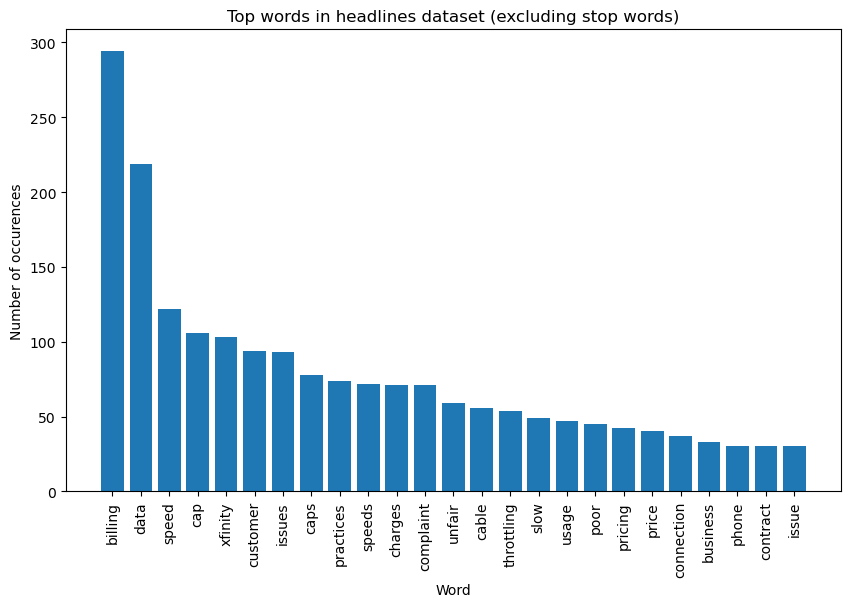

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer,
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [14]:
from textblob import TextBlob
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [15]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = []
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1

print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per complaint: ', np.mean(word_counts))

Total number of words:  8008
Mean number of words per complaint:  3.6007194244604315


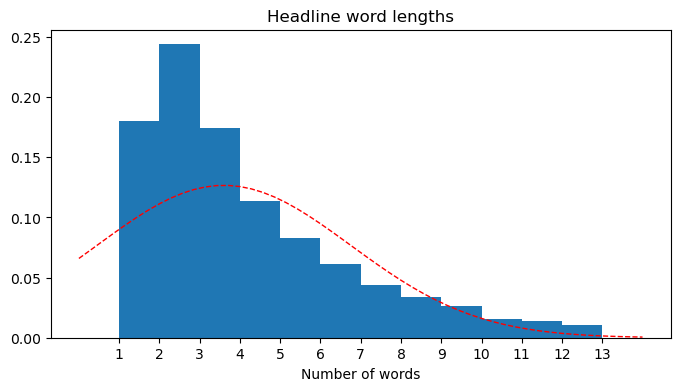

In [16]:
import scipy.stats as stats

y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(8,4))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

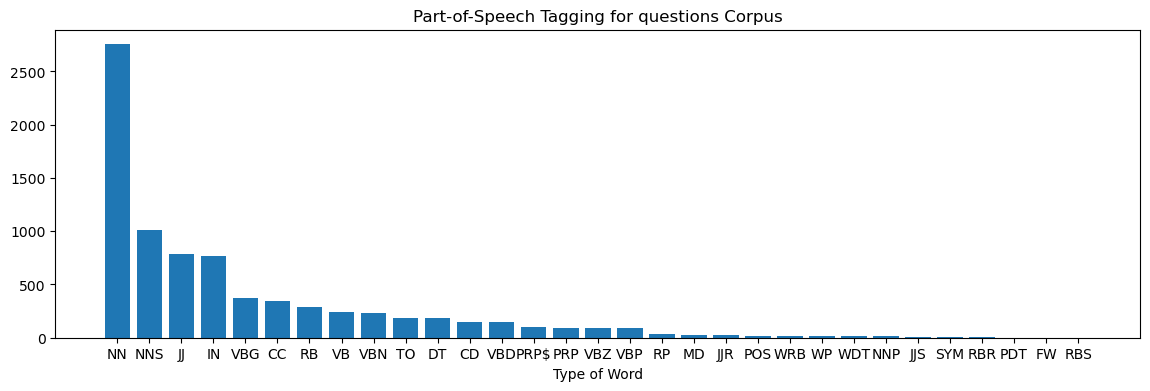

In [17]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for questions Corpus');
ax.set_xlabel('Type of Word');

### CASE 분류
---

In [18]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
#small_text_sample = reindexed_data.sample(n=500, random_state=123).values
small_text_sample = reindexed_data.values

print('Complaints before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Complaints after vectorization: \n{}'.format(small_document_term_matrix[123]))

Complaints before vectorization:  data caps
Complaints after vectorization: 
  (0, 327)	1
  (0, 200)	1


In [19]:
#n_topics : Complaint를 몇개의 유형으로 나눌 것인지
#number of topics 5,6 괜찮음
#사전에 전체 데이터 중 500개를 샘플링해서 LSA / LDA 모델을 수행한 결과, 클러스터링 결과가 n=6에서 가장 결과가 괜찮았기 때문에 해당 값을 사용한다.
n_topics = 6

#### Latent Semantic Analysis (LSA)

In [20]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [21]:
from collections import Counter

# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [22]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [23]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii',errors="ignore").decode('utf-8',errors="ignore"))
        top_words.append(" ".join(topic_words))
    return top_words

In [24]:
#각 문의유형별 언급된 keyword top10 보여주기. 이를 통해 각 문의유형(topic)의 특징을 알 수 있다.
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  billing practices issues unfair issue deceptive fraudulent customer complaint fraud
Topic 2:  data cap caps usage overage charges 300gb limit month meter
Topic 3:  speed throttling price slow connection high false paying monopoly tv
Topic 4:  xfinity customer complaint cable poor contract problems phone fee terrible
Topic 5:  issues email account mail connectivity frequent signal constant non refund
Topic 6:  speeds charges pricing unfair business charged slow bait switch prices


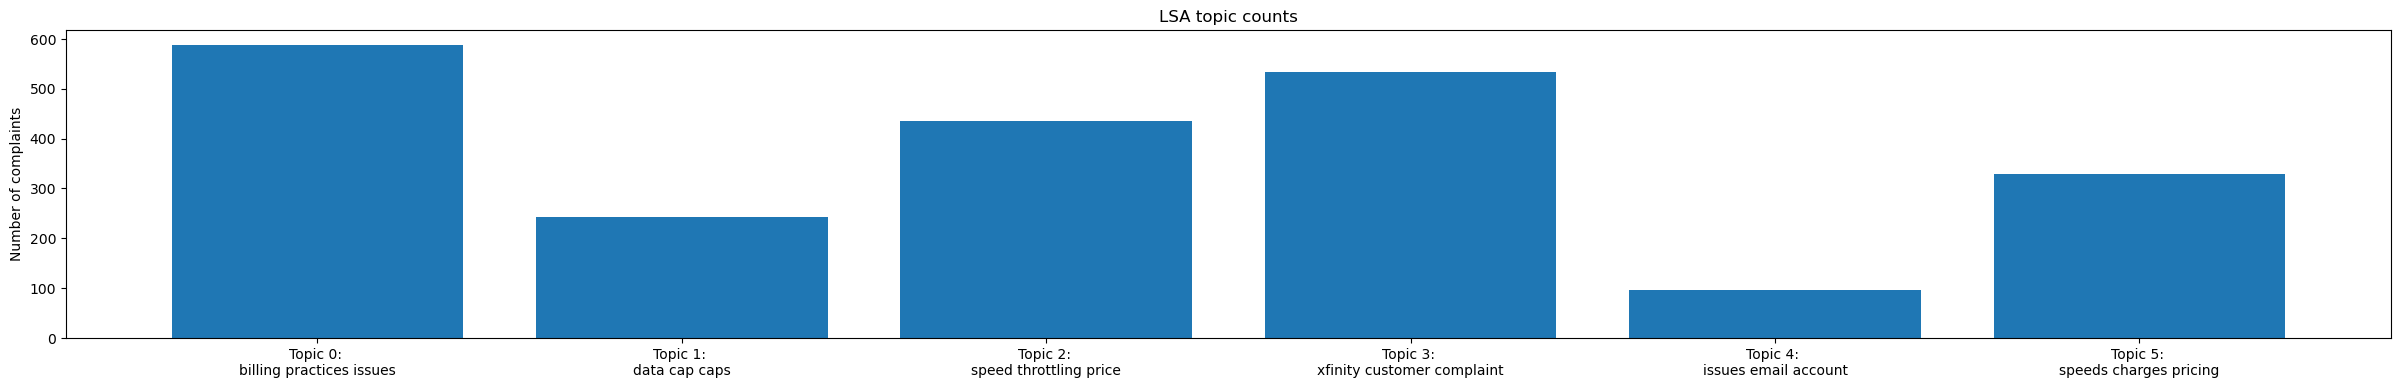

In [25]:
#각 문의유형별 count수 시각화
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(30,4))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of complaints');
ax.set_title('LSA topic counts');
plt.show()

> t-SNE로 LSA 모델 평가

In [26]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2224 samples in 0.003s...
[t-SNE] Computed neighbors for 2224 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2224
[t-SNE] Computed conditional probabilities for sample 2000 / 2224
[t-SNE] Computed conditional probabilities for sample 2224 / 2224
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.024250
[t-SNE] KL divergence after 2000 iterations: 0.314969


In [27]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])

        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [28]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [29]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
plt.rcParams['figure.figsize'] = [16, 10]

top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), min_width=700, height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1],
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

Loading BokehJS ...

LSA를 이용한 분류 결과가 애매하다. LDA를 한번 시도해본다.

#### Latent Dirichilet Allocation (LDA)

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online',
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [31]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [32]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  billing issues xfinity issue tv customer speed home unable security
Topic 2:  billing practices unfair customer price hbo xfinity speed business terrible
Topic 3:  poor connection customer false phone billing business quality lied new
Topic 4:  cable charged charge charging bait fee contract switch fees failure
Topic 5:  data cap caps speed charges usage throttling overage billing fraudulent
Topic 6:  complaint speeds slow pricing billing problems advertised lack deceptive speed


1번 그룹 : 요금 청구 프로세스 관련 문의(xfinity, tv, home, security 등..)

2번 그룹 : 요금 정책 불만(계약 내용이 불공정하다 등..)

3번 그룹 : 연결 문제로 인한 속도저하

4번 그룹 : 청구 요금 관련 문제

5번 그룹 : 데이터 용량 관련 문의

6번그룹 : 속도 관련 일반적 불만사함

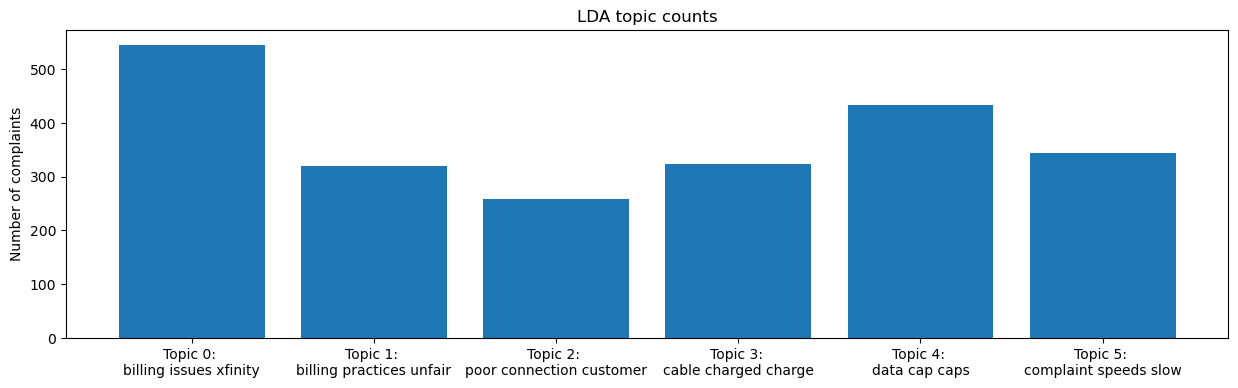

In [33]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(15,4))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of complaints');

> t-SNE를 이용한 평가

In [34]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2224 samples in 0.002s...
[t-SNE] Computed neighbors for 2224 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2224
[t-SNE] Computed conditional probabilities for sample 2000 / 2224
[t-SNE] Computed conditional probabilities for sample 2224 / 2224
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.916489
[t-SNE] KL divergence after 2000 iterations: 0.306577


In [35]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), min_width=700, height=500)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

LSA를 이용했을때보다 클러스터링 결과가 더 좋게 나온것을 볼 수 있다. 따라서 LDA를 이용한 결과를 프로젝트 데이터에 적용한다.

> LDA 분류 결과를 df에 반영

In [36]:
df_new = df.copy()

df_new['Complaint Type'] = lda_topic_matrix.argmax(axis=1)

df_new['Complaint Type'] = df_new['Complaint Type'].astype('category')

df_new['Complaint Type'].replace(0, 'billing issues', inplace=True)
df_new['Complaint Type'].replace(1, 'billing practices', inplace=True)
df_new['Complaint Type'].replace(2, 'connection', inplace=True)
df_new['Complaint Type'].replace(3, 'charge', inplace=True)
df_new['Complaint Type'].replace(4, 'data cap', inplace=True)
df_new['Complaint Type'].replace(5, 'speed complaint', inplace=True)

df_new

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Complaint Type
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,speed complaint
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,connection
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,data cap
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,connection
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,data cap
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,charge
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,speed complaint
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23 23:13:30,speed complaint


## **Process 03**
**데이터 EDA를 통한 인사이트 추출**
---

In [37]:
df_new.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Complaint Type
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,speed complaint
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,connection
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,data cap
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,connection
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,charge


In [38]:
df_new.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'DateTime', 'Complaint Type'],
      dtype='object')

In [39]:
df_new['Complaint Type'].value_counts()

Complaint Type
billing issues       545
data cap             433
speed complaint      344
charge               324
billing practices    319
connection           259
Name: count, dtype: int64

In [40]:
df_new['Filing on Behalf of Someone'].value_counts()

Filing on Behalf of Someone
No     2021
Yes     203
Name: count, dtype: int64

### State(주)별 Complaint 분포 조사
---

In [41]:
df_pivot = df_new.pivot_table(index = 'State', columns = 'Complaint Type', aggfunc='size')
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.sort_values('Total', ascending=False, inplace=True)
df_pivot

Complaint Type,billing issues,billing practices,connection,charge,data cap,speed complaint,Total
State,,,,,,,
Georgia,63,27,24,25,132,17,288
Florida,70,36,38,45,14,37,240
California,44,41,34,36,23,42,220
Illinois,39,30,17,28,19,31,164
Tennessee,25,11,10,18,68,11,143
Pennsylvania,33,31,12,20,12,22,130
Michigan,35,17,12,13,17,21,115
Washington,27,11,9,17,11,23,98
Colorado,16,12,12,9,10,21,80


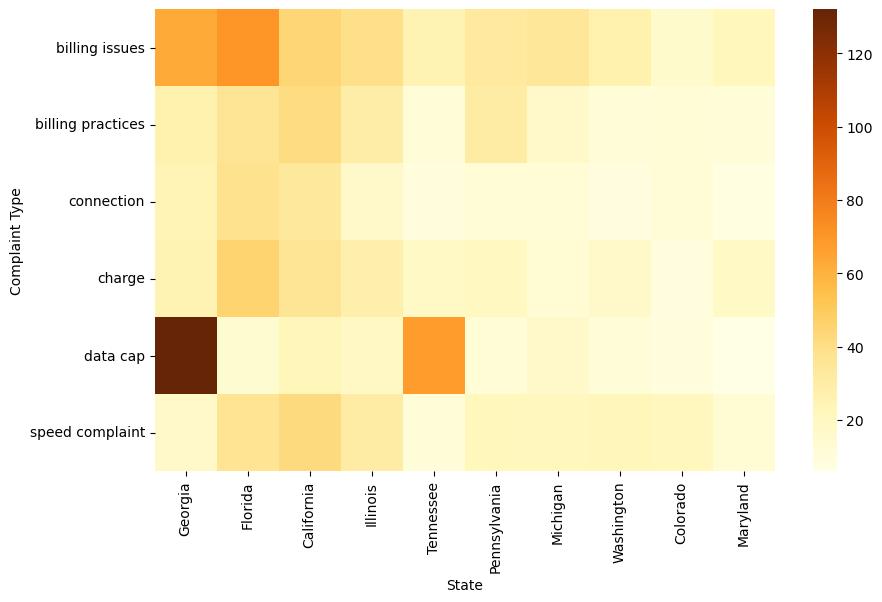

In [42]:
#문의수 top10을 기록한 State의 문의유형을 Heatmap을 이용해 조회한다.
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot.iloc[:,:-1].head(10).T, cmap='YlOrBr')

plt.show()

위 히트맵 그래프를 통해 각 불만 유형별 접수가 많이 되는 State를 알 수 있다.
1. Billing Issue : Florida - Georgia 주가 유독 눈에 띈다.
2. Billing Practices : California - Florida
3. Connection : Florida, California
4. Charge : Florida, California
5. Data Gap : Georgia, Tennessee
6. Speed Complaint : California, Florida
---
종합해봤을때, 다음과 같은 정보를 얻을 수 있다.

1. 전반적인 문의 유형에서 상위권을 차지하는 주는 Florida, California 주이다. 해당 지역에서 이렇게 문의수가 많은지 그 원인을 찾아볼 필요가 있을 것이다(예를들어 해당 지역들이 고객수가 많아서 자연적으로 문의수가 많은 것인지 등..)
2. Georgia주가 가장 문의수가 많은 주이지만, 그 원인은 Data Cap 관련 문의수가 다른 주에 비해 독보적으로 많기 때문이다. 그 원인을 추후 다른 데이터를 이용해 조사해볼 필요가 있다.
3. Tennessee주는 다른 주와 큰 문의수 차이는 없지만 유독 Data Cap 관련 문의수가 Georgia주 다음으로 많다. 이 부분 역시 조사해봐야할 것이다.
4. Billing Issue 관련하여 Florida, Georgia 주가 유독 눈에띄게 많다.

### 날짜별 Complaint 분포 조사
---

> #### 월(month)

In [43]:
df_new.groupby(df_new.DateTime.dt.month).size()

DateTime
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
dtype: int64

In [44]:
len(df_new[df_new.DateTime.dt.month.isin([4,5,6])]) / len(df_new)

0.7814748201438849

다른 날에 비해 4~6월이 유독 문의 수가 많으며, 특히 6월에 문의 수가 폭증했다.

In [45]:
df_new[df_new.DateTime.dt.month == 6]['Complaint Type'].value_counts()

Complaint Type
data cap             231
billing issues       221
speed complaint      182
billing practices    165
charge               138
connection           109
Name: count, dtype: int64

In [46]:
# 6월의 각 문의 유형마다 전체 데이터의 문의 유형 수로 나눈다
x=[]
for i in [4,5,6]:
  x.append(round(df_new[df_new.DateTime.dt.month == i]['Complaint Type'].value_counts().sort_index() \
        / df_new['Complaint Type'].value_counts().sort_index(), 4))

df_month = pd.concat([x[0], x[1], x[2]], axis=1)
df_month.columns = [4,5,6]
df_month['Total'] = df_month.sum(axis=1)
df_month

,4,5,6,Total
Complaint Type,,,,
billing issues,0.1761,0.1633,0.4055,0.7449
billing practices,0.1599,0.1254,0.5172,0.8025
connection,0.1853,0.1544,0.4208,0.7605
charge,0.1759,0.1605,0.4259,0.7623
data cap,0.1363,0.1594,0.5335,0.8292
speed complaint,0.1860,0.0785,0.5291,0.7936


4월-6월의 문의건수가 전체의 75-80%를 차지한다. 그리고 6월의 경우에는 전체의 40-50%를 차지했다.

프로젝트의 데이터셋에서는 2015년의 데이터밖에 없어 매년 4~6월마다 이러한 주기성을 갖는다고 말할 수는 없겠다. 하지만 해당 월에 어떤 이슈 또는 마케팅 이벤트 등이 있었는지 조사해볼 필요가 있다.

> #### 일

---
통신사 요금은 매월 특정한 날짜에 청구된다. 그러므로 특정 날짜 주변 일자에 문의수가 몰릴 것이라고 가설을 세워볼 수 있다.

In [47]:
df_new.groupby(df_new.DateTime.dt.day).size().sort_index()

DateTime
4     206
5     131
6     272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
dtype: int64

4일,5일, 6일, 23일, 24일이 문의건수 상위 5개 그룹이다. 해당 일자들의 문의유형을 추가로 살펴본다.

In [48]:
x=[]

for i in range(5):
  dayz = df_new.groupby(df_new.DateTime.dt.day).size().sort_values(ascending=False).head().index[i]
  zz = df_new[df_new.DateTime.dt.day == dayz]['Complaint Type'].value_counts().reset_index()
  zz.columns = [(dayz, 'Complaint Type'), (dayz, 'Count')]
  x.append(zz)
  if i > 0 :
    x[0] = pd.concat([x[0], x[i]], axis=1)
x[0].rename_axis('order')

,"(6, Complaint Type)","(6, Count)","(24, Complaint Type)","(24, Count)","(23, Complaint Type)","(23, Count)","(4, Complaint Type)","(4, Count)","(5, Complaint Type)","(5, Count)"
order,,,,,,,,,,
0,billing issues,76,data cap,59,data cap,47,billing issues,61,billing issues,36
1,data cap,52,speed complaint,52,billing issues,45,charge,37,charge,25
2,speed complaint,39,billing issues,44,billing practices,41,data cap,32,speed complaint,23
3,connection,38,billing practices,38,speed complaint,39,billing practices,29,billing practices,17
4,charge,34,connection,29,charge,32,connection,25,connection,16
5,billing practices,33,charge,27,connection,21,speed complaint,22,data cap,14


다른 일자들과 비교했을때, 4일의 경우가 billing issues, charge 및 billing practices가 순서의 상위에 차례로 왔다(data cap 제외). 가설대로라면 4일이 당사의 요금청구일이 될 것이다. 혹은 위 세가지 문의 유형의 값이 많이 있는 6일도 요금청구일이 될 수 있다.

### 문의상태별 문의 유형 조사
---

In [49]:
df_pivot = df_new.pivot_table(index='Status', columns='Complaint Type', aggfunc='size')

new_order = ['Open','Pending','Closed','Solved']
df_pivot = df_pivot.reindex(new_order)

df_pivot.loc['Total'] = df_pivot.sum()
df_pivot

Complaint Type,billing issues,billing practices,connection,charge,data cap,speed complaint
Status,,,,,,
Open,82,47,37,48,75,74
Pending,19,12,5,13,85,20
Closed,199,101,93,113,110,118
Solved,245,159,124,150,163,132
Total,545,319,259,324,433,344


In [50]:
df_pivot_ratio = df_pivot.copy()
for i in range(len(df_pivot_ratio.columns)-1):
    df_pivot_ratio.iloc[i,:] = df_pivot_ratio.iloc[i,:] / df_pivot_ratio.loc['Total']
df_pivot_ratio = df_pivot_ratio.iloc[:-1,:]
df_pivot_ratio

Complaint Type,billing issues,billing practices,connection,charge,data cap,speed complaint
Status,,,,,,
Open,0.150459,0.147335,0.142857,0.148148,0.173210,0.215116
Pending,0.034862,0.037618,0.019305,0.040123,0.196305,0.058140
Closed,0.365138,0.316614,0.359073,0.348765,0.254042,0.343023
Solved,0.449541,0.498433,0.478764,0.462963,0.376443,0.383721


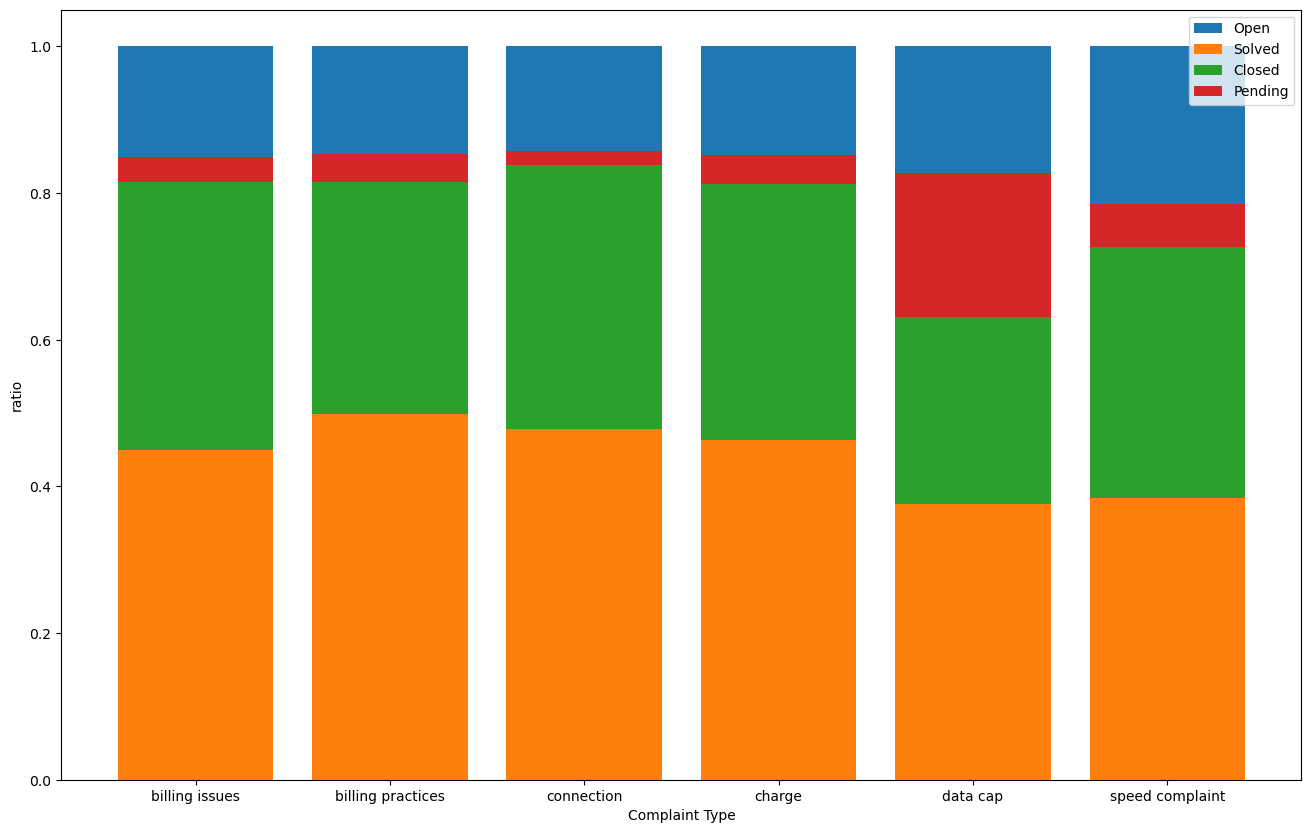

In [51]:
fig, ax = plt.subplots()

# Stacked bar chart
for i in range(len(df_pivot_ratio)):
  ax.bar(df_pivot_ratio.columns, df_pivot_ratio.iloc[-i,:], bottom = df_pivot_ratio.iloc[:-i:-1,:].sum(), label = df_pivot_ratio.index[-i])

ax.legend()
ax.set_ylabel('ratio')
ax.set_xlabel('Complaint Type')
plt.show()

위 결과를 통해 다음과 같은 사실을 알 수 있다.
1. 대부분의 문의유형의 경우 Closed / Solved 상태의 비율이 80%를 차지하지만, "Data Cap"유형일때는 해당 비율이 60%대까지 낮아진다. 유추해봤을때 이 유형은 처리하기 다른 경우에 비해 처리가 까다로운 유형일 것이라고 생각한다.
2. "Speed Complaint" 유형은 Closed / Solved 상태의 비율이 두번째로 낮으며, Open 상태의 비율이 가장 높다. 인터넷 속도 저하에 대한 원인은 다양하므로 문제 해결에 시간이 걸리는 것이 아닌가 예상해본다.  

## **Lesson Learned**
---


처음으로 해본 자연어 처리 프로젝트였다. 캐글의 도움을 받아 어찌저찌 토픽 추출 및 케이스 분류까지 해볼 수 있었다. 클러스터링 알고리즘으로 LSA, LDA가 있다는 것을 처음 알았다. 두 알고리즘에 대해 더 공부해봐야 할 것 같다. 또한 클러스터링이 잘되어있는지 평가하는 모델로 t-SNE를 사용했는데, 이는 나중에 고객 Segmentation 프로젝트 등에서 활용이 가능할 것 같다.

자연어 처리가 끝나고나니, 이후의 과정은 평범한 EDA과정으로 다소 쉬워졌다.

---

VOC분석에서 고객 문의 유형은 크게 3가지로 나뉜다고 한다.
1. 되는 기능인데 고객이 몰라서 물어보는것
2. 되는 기능인데 오류로 인해서 안되는 것
3. 원래 안되는 기능인데 고객이 원하는 것

통신 쪽 도메인 지식에 대해 조금 더 알고 있더라면, 고객 문의 유형을 분류할 때 위 3가지 유형을 참고해서 잘 다듬을 수 있었을 것이다.

그리고 고객 문의 유형중에 어떤 것은 처리가 쉽고 당사 입장에서도 크리티컬한 문제가 아닌 반면, 어떤 유형은 처리가 어렵거나 해결이 안될경우 고객 이탈까지 연계될 수 있는 치명적인 문제들도 있을 것이다. 역시나 도메인 지식이 좀 더 있다면 문의 유형을 중요도를 기준으로 분류해서, 프로젝트 목표에 맞는 솔루션을 제시할 수 있을 것이다.

---

본인이 생각했을때는 connection 관련 문제가 많았던 Florida 주 문제 부분, 그리고 Data Capacity 유형에서 closed/solved상태 비율이 낮은 부분이 통신사에서 우선적으로 해결해야할 과제라고 생각한다.